<a href="https://colab.research.google.com/github/Veiga-Gui/Analise-de-tweets-2-turno-eleices-2022/blob/main/nlp_ESTXHID_construflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
resenha = pd.read_csv("/content/drive/MyDrive/Construflow - Data Science/dfEstHid.csv")
resenha = resenha.rename(columns={'categoria-agrupada': 'agrupamento'})
resenha.head()

Mounted at /content/drive


,issueId,title,description,agrupamento,name
0,119565,ENCHIMENTO COZINHA,ARQ e/ou Cliente avaliar se haverá mureta para...,Interferência/Divergência entre disciplinas/Clash,AB Incorporadora
1,93846,Estudo Preliminar - TODOS,"Conforme alinhado na reunião inicial, realizad...",Alteração de premissas/Definição,AB Incorporadora
2,119226,Vigas x ambientes,"Conforme solicitação de Briefing, as tubulaçõe...",Interferência/Divergência entre disciplinas/Clash,AB Incorporadora
3,94783,Poço Pluvial Subsolo,Considerando que as instalações de coletas plu...,Alteração de premissas/Definição,AB Incorporadora
4,99553,Estudo de Pilares,Em razão do novo estudo de interiores do 2º pa...,Sugestão de mudança/Otimização,AB Incorporadora


In [ ]:
classificacao = resenha["agrupamento"].replace(["Interferência/Divergência entre disciplinas/Clash"],[1])
resenha["classificacao"] = classificacao
resenha.head()

,issueId,title,description,agrupamento,name,classificacao
0,119565,ENCHIMENTO COZINHA,ARQ e/ou Cliente avaliar se haverá mureta para...,Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1
1,93846,Estudo Preliminar - TODOS,"Conforme alinhado na reunião inicial, realizad...",Alteração de premissas/Definição,AB Incorporadora,Alteração de premissas/Definição
2,119226,Vigas x ambientes,"Conforme solicitação de Briefing, as tubulaçõe...",Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1
3,94783,Poço Pluvial Subsolo,Considerando que as instalações de coletas plu...,Alteração de premissas/Definição,AB Incorporadora,Alteração de premissas/Definição
4,99553,Estudo de Pilares,Em razão do novo estudo de interiores do 2º pa...,Sugestão de mudança/Otimização,AB Incorporadora,Sugestão de mudança/Otimização


In [ ]:
resenha =  resenha.query("classificacao == 1")
resenha.head()

,issueId,title,description,agrupamento,name,classificacao
0,119565,ENCHIMENTO COZINHA,ARQ e/ou Cliente avaliar se haverá mureta para...,Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1
2,119226,Vigas x ambientes,"Conforme solicitação de Briefing, as tubulaçõe...",Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1
8,88800,Furação de Saída Pluvial,A furação feita na viga subiu nosso sistema im...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1
12,80692,Descida de shaft no lazer (3),Descida do shaft do banheiro em cima de viga n...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1
13,87908,Guarda corpo - desenho de fachada,Identificado conflito entre projeto de fachada...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(resenha['description'].apply(lambda x: np.str_(x)))

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

textos = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(textos)

In [ ]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [ ]:
import nltk

todas_palavras = ' '.join([str(texto) for texto in resenha["description"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})

In [ ]:
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia.head()

,Palavra,Frequência
15,de,1506
1104,-,1276
87,a,975
32,com,951
82,do,874


In [ ]:
%matplotlib inline

from wordcloud import WordCloud

In [ ]:
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todas_palavras)

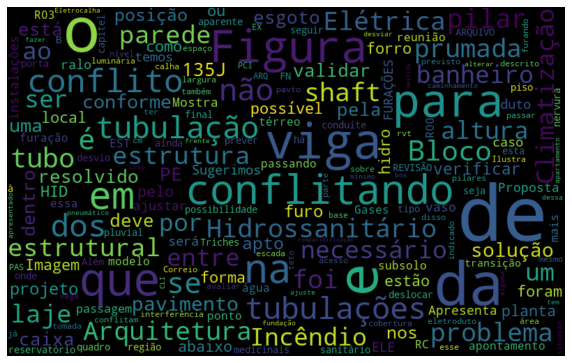

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

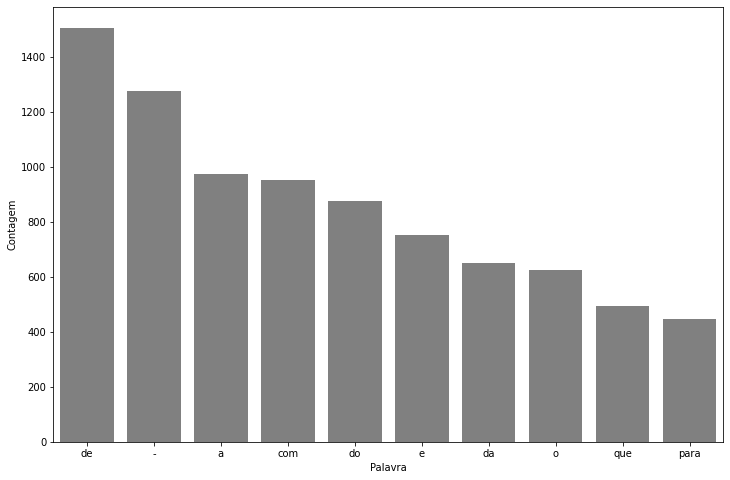

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

In [ ]:
nltk.download('stopwords')

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()
resenha['description'] = resenha['description'].replace(np.nan, '')

for opiniao in resenha["description"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

resenha.head()

,issueId,title,description,agrupamento,name,classificacao,tratamento_1
0,119565,ENCHIMENTO COZINHA,ARQ e/ou Cliente avaliar se haverá mureta para...,Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1,ARQ e/ou Cliente avaliar haverá mureta esconde...
2,119226,Vigas x ambientes,"Conforme solicitação de Briefing, as tubulaçõe...",Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1,"Conforme solicitação Briefing, tubulações água..."
8,88800,Furação de Saída Pluvial,A furação feita na viga subiu nosso sistema im...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,A furação feita viga subiu sistema impossibili...
12,80692,Descida de shaft no lazer (3),Descida do shaft do banheiro em cima de viga n...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,Descida shaft banheiro cima viga pavimento laz...
13,87908,Guarda corpo - desenho de fachada,Identificado conflito entre projeto de fachada...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,Identificado conflito projeto fachada estrutur...


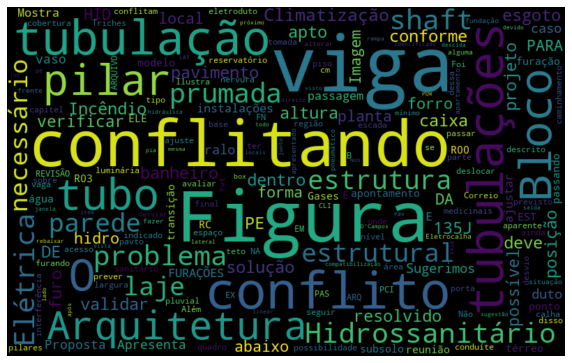

In [ ]:
def nuvem_palavras(texto, coluna_texto):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
nuvem_palavras(resenha, "tratamento_1")

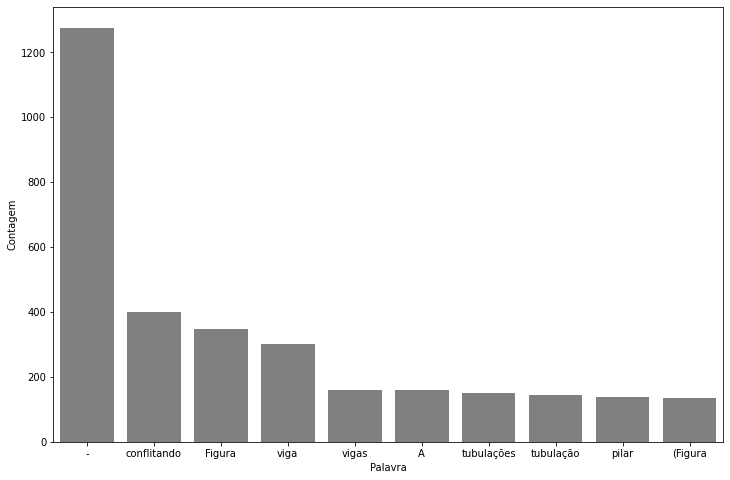

In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(resenha, "tratamento_1", 10)

In [ ]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [ ]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

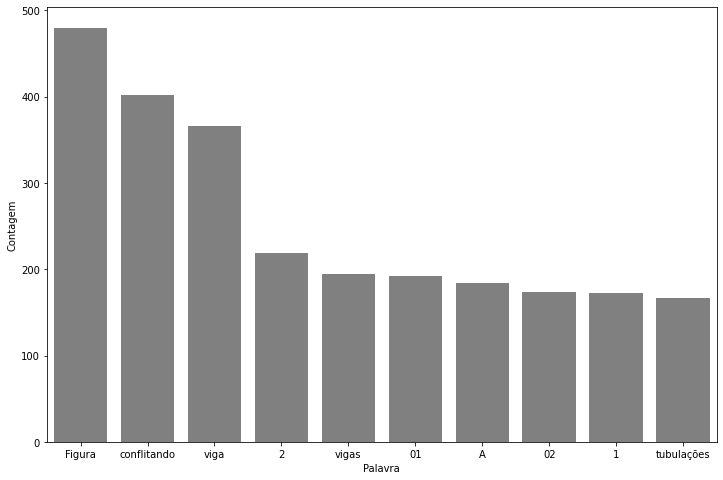

In [ ]:
pareto(resenha, "tratamento_2", 10)

In [ ]:
frase_processada = list()
for opiniao in resenha["tratamento_2"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

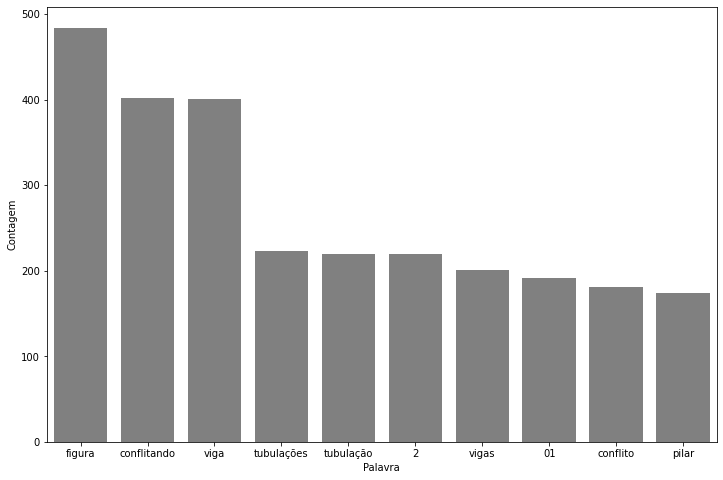

In [ ]:

pareto(resenha, "tratamento_3", 10)

In [ ]:
nltk.download('rslp')
stemmer = nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

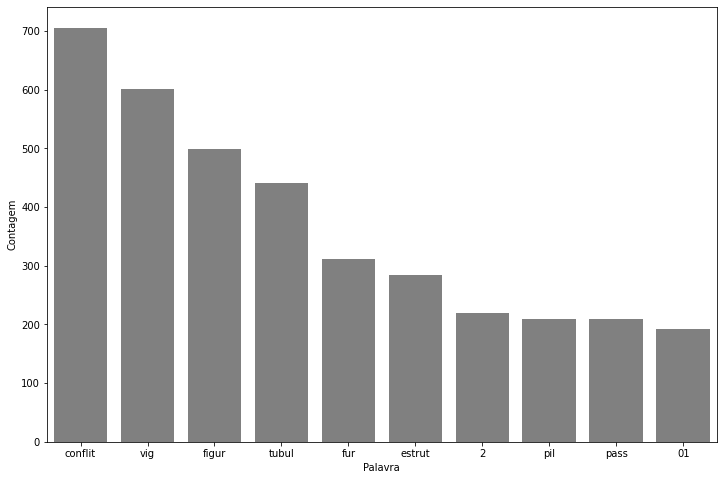

In [ ]:

pareto(resenha, "tratamento_4", 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assiti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
resenha.head()

,issueId,title,description,agrupamento,name,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,119565,ENCHIMENTO COZINHA,ARQ e/ou Cliente avaliar se haverá mureta para...,Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1,ARQ e/ou Cliente avaliar haverá mureta esconde...,ARQ Cliente avaliar haverá mureta esconder tub...,arq cliente avaliar haverá mureta esconder tub...,arq client avali hav muret escond tubul apart ...
2,119226,Vigas x ambientes,"Conforme solicitação de Briefing, as tubulaçõe...",Interferência/Divergência entre disciplinas/Clash,AB Incorporadora,1,"Conforme solicitação Briefing, tubulações água...",Conforme solicitação Briefing tubulações água ...,conforme solicitação briefing tubulações água ...,conform solicit briefing tubul águ dev der pas...
8,88800,Furação de Saída Pluvial,A furação feita na viga subiu nosso sistema im...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,A furação feita viga subiu sistema impossibili...,A furação feita viga subiu sistema impossibili...,furação feita viga subiu sistema impossibilita...,fur feit vig sub sistem impossibilit pass deba...
12,80692,Descida de shaft no lazer (3),Descida do shaft do banheiro em cima de viga n...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,Descida shaft banheiro cima viga pavimento laz...,Descida shaft banheiro cima viga pavimento laz...,descida shaft banheiro cima viga pavimento laz...,desc shaft banh cim vig pav laz valid vig nest...
13,87908,Guarda corpo - desenho de fachada,Identificado conflito entre projeto de fachada...,Interferência/Divergência entre disciplinas/Clash,Alumbra Empreendimentos,1,Identificado conflito projeto fachada estrutur...,Identificado conflito projeto fachada estrutur...,identificado conflito projeto fachada estrutur...,identific conflit projet fach estrut acord pro...


In [ ]:
resenha.to_csv("estxhid.csv")

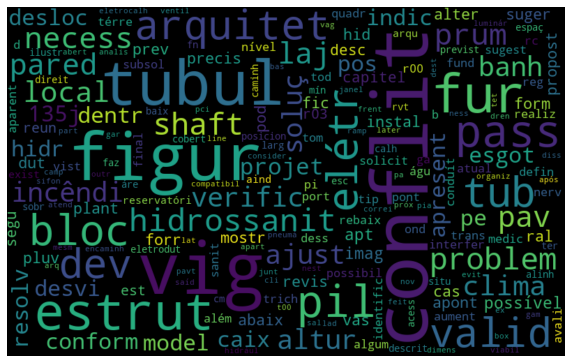

In [ ]:
nuvem_palavras(resenha, "tratamento_4")